In [95]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


Only including players taken in round 9 or earlier for consitincey as players taken after round 9 today would be considered undrafted players, (current draft is 7 rounds long but typically includes comp picks starting in 1995)

In [96]:
df = pd.read_csv("./data_sets/nfl_draft.csv")

df = df[df['rnd'] <= 9]

Very few players specified as either S or CB changing to DB for more consitency

In [97]:
df['pos'] = df['pos'].replace(['S', 'CB'], "DB")
df['career_length'] = (df['g'] >= 45).astype(int)
df['restav'] = df['carav'] - df['first4av']

In [98]:
rb_df = df[df['pos'] == "RB"]
rb_df = rb_df[[
       #'column_a', 'player_id', 
       'year', 'rnd', 'pick', 'tm', 'player', 'hof',
       'pos', 'position_standard', 'first4av', 'age', 'to', 'ap1', 'pb', 'st',
       'carav', 'drav', 'g', 
       #'cmp', 'pass_att', 'pass_yds', 'pass_td','pass_int', 
       'rush_att', 'rush_yds', 'rush_tds', 'rec', 'rec_yds', 'rec_tds', 
       #'tkl', 'def_int', 'sk', 
       'college_univ',
       'career_length', 'restav']]
before_df = rb_df[rb_df['year'] < 2000]
after_df = rb_df[rb_df['year'] >= 2000]

In [99]:
df.shape

(7764, 36)

In [100]:
df.columns

Index(['column_a', 'player_id', 'year', 'rnd', 'pick', 'tm', 'player', 'hof',
       'pos', 'position_standard', 'first4av', 'age', 'to', 'ap1', 'pb', 'st',
       'carav', 'drav', 'g', 'cmp', 'pass_att', 'pass_yds', 'pass_td',
       'pass_int', 'rush_att', 'rush_yds', 'rush_tds', 'rec', 'rec_yds',
       'rec_tds', 'tkl', 'def_int', 'sk', 'college_univ', 'career_length',
       'restav'],
      dtype='object')

In [101]:
df.dtypes

column_a              object
player_id             object
year                   int64
rnd                    int64
pick                   int64
tm                    object
player                object
hof                   object
pos                   object
position_standard     object
first4av               int64
age                  float64
to                   float64
ap1                    int64
pb                     int64
st                     int64
carav                float64
drav                 float64
g                    float64
cmp                  float64
pass_att             float64
pass_yds             float64
pass_td              float64
pass_int             float64
rush_att             float64
rush_yds             float64
rush_tds             float64
rec                  float64
rec_yds              float64
rec_tds              float64
tkl                  float64
def_int              float64
sk                    object
college_univ          object
career_length 

In [102]:
df.isna().sum()

column_a                0
player_id             850
year                    0
rnd                     0
pick                    0
tm                      0
player                  0
hof                     0
pos                     0
position_standard       0
first4av                0
age                   876
to                   1013
ap1                     0
pb                      0
st                      0
carav                1013
drav                 1710
g                    1046
cmp                  7184
pass_att             7184
pass_yds             7184
pass_td              7184
pass_int             7184
rush_att             6182
rush_yds             6182
rush_tds             6182
rec                  5678
rec_yds              5678
rec_tds              5678
tkl                  3693
def_int              6211
sk                   4387
college_univ         2759
career_length           0
restav               1013
dtype: int64

In [103]:
df.head()

,column_a,player_id,year,rnd,pick,tm,player,hof,pos,position_standard,...,rush_tds,rec,rec_yds,rec_tds,tkl,def_int,sk,college_univ,career_length,restav
0,2015Jameis Winston,WinsJa00,2015,1,1,TAM,Jameis Winston,No,QB,QB,...,7.0,NaN,NaN,NaN,NaN,NaN,NaN,Florida St.,0,0.0
1,2015Marcus Mariota,MariMa01,2015,1,2,TEN,Marcus Mariota,No,QB,QB,...,4.0,1.0,41.0,1.0,NaN,NaN,NaN,Oregon,0,0.0
2,2015Dante Fowler,FowlDa00,2015,1,3,JAX,Dante Fowler,No,OLB,LB,...,NaN,NaN,NaN,NaN,16.0,NaN,2.5,Florida,0,0.0
3,2015Amari Cooper,CoopAm00,2015,1,4,OAK,Amari Cooper,No,WR,WR,...,0.0,134.0,1970.0,9.0,NaN,NaN,NaN,Alabama,0,0.0
4,2015Brandon Scherff,ScheBr00,2015,1,5,WAS,Brandon Scherff,No,T,T,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Iowa,0,0.0


In [104]:
df.describe()

,year,rnd,pick,first4av,age,to,ap1,pb,st,carav,...,rush_att,rush_yds,rush_tds,rec,rec_yds,rec_tds,tkl,def_int,career_length,restav
count,7764.000000,7764.000000,7764.000000,7764.000000,6888.000000,6751.000000,7764.000000,7764.000000,7764.000000,6751.000000,...,1582.000000,1582.000000,1582.000000,2086.000000,2086.000000,2086.000000,4071.000000,1553.00000,7764.000000,6751.000000
mean,2000.122360,4.431607,125.870814,10.576249,22.638792,2005.189009,0.079727,0.297012,1.945003,17.663902,...,207.405183,849.927307,5.935525,108.048897,1272.373921,7.588207,87.520511,9.36349,0.470634,5.500667
std,8.964525,2.211847,72.542078,13.373545,0.848072,8.777233,0.484681,1.148572,3.032681,22.587792,...,460.264583,1944.751494,14.151646,172.401677,2261.592016,15.274016,150.044036,16.22108,0.499169,12.049600
min,1985.000000,1.000000,1.000000,-4.000000,20.000000,1985.000000,0.000000,0.000000,0.000000,-4.000000,...,0.000000,-36.000000,0.000000,0.000000,-19.000000,0.000000,1.000000,0.50000,0.000000,-7.000000
25%,1992.000000,3.000000,63.000000,0.000000,22.000000,1998.000000,0.000000,0.000000,0.000000,2.000000,...,3.000000,11.000000,0.000000,5.000000,43.250000,0.000000,4.000000,1.00000,0.000000,0.000000
50%,2000.000000,4.000000,126.000000,5.000000,23.000000,2006.000000,0.000000,0.000000,0.000000,8.000000,...,22.000000,98.000000,0.000000,36.000000,326.500000,1.000000,17.000000,3.50000,0.000000,0.000000
75%,2008.000000,6.000000,188.000000,17.000000,23.000000,2013.000000,0.000000,0.000000,3.000000,26.000000,...,189.000000,688.750000,5.000000,142.000000,1426.250000,8.000000,103.500000,10.00000,1.000000,5.000000
max,2015.000000,9.000000,262.000000,88.000000,29.000000,2016.000000,10.000000,14.000000,19.000000,177.000000,...,4409.000000,18355.000000,164.000000,1549.000000,22895.000000,197.000000,1562.000000,200.00000,1.000000,109.000000


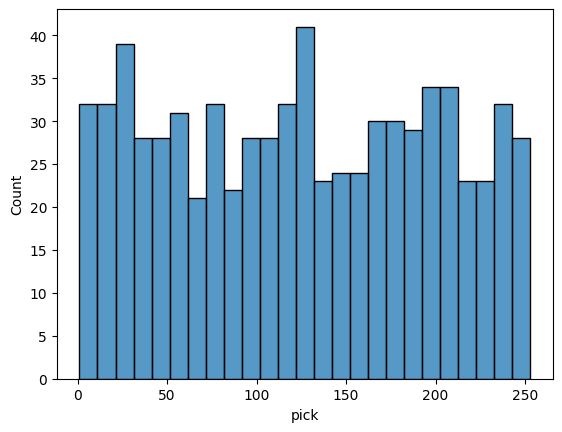

In [135]:
sns.histplot(rb_df, x="pick", bins=25)
plt.show()


c:\Users\Intern\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


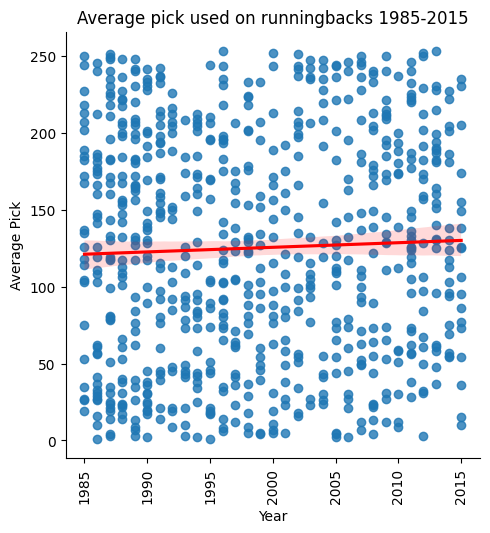

In [106]:
sns.lmplot(rb_df, x='year', y="pick", line_kws={'color': 'red'})
plt.xlabel("Year")
plt.ylabel("Average Pick")
plt.xticks(rotation='vertical')
plt.title(f"Average pick used on runningbacks 1985-2015")
plt.show()



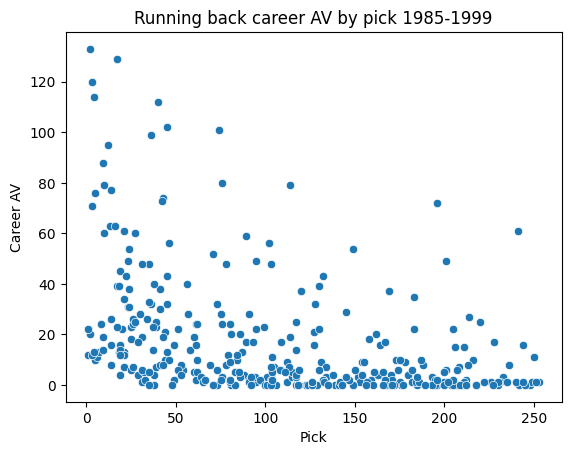

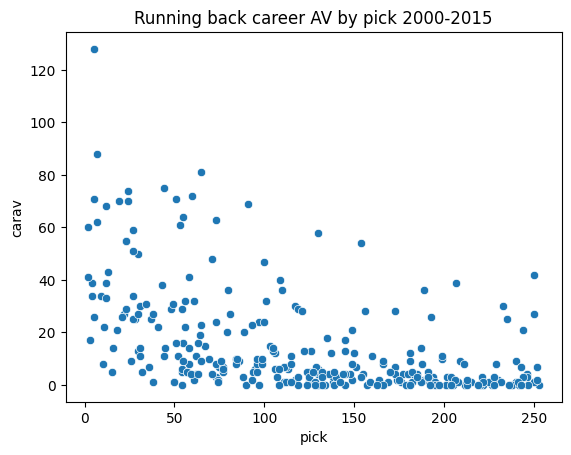

In [107]:
sns.scatterplot(before_df, x="pick", y="carav")

plt.xlabel("Pick")
plt.ylabel("Career AV")
plt.title(f"Running back career AV by pick 1985-1999")
plt.show()
sns.scatterplot(after_df, x="pick", y="carav")
plt.title(f"Running back career AV by pick 2000-2015")
plt.show()

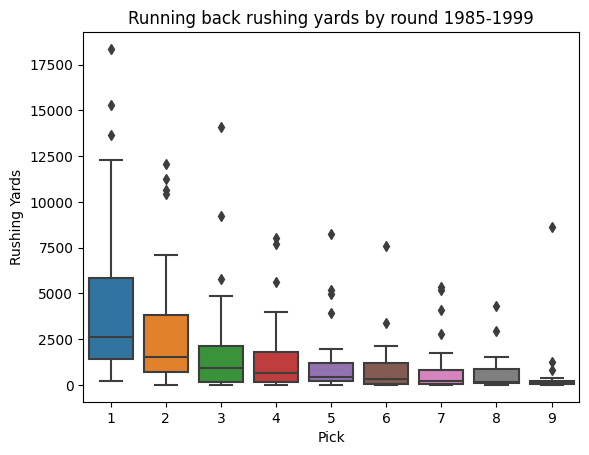

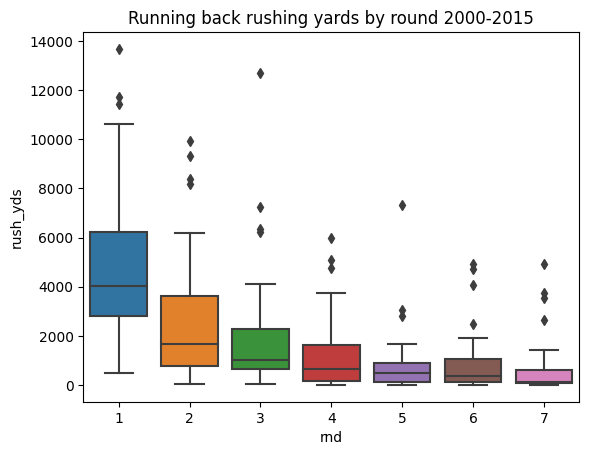

In [108]:
sns.boxplot(before_df, x="rnd", y="rush_yds")
plt.xlabel("Pick")
plt.ylabel("Rushing Yards")
plt.title(f"Running back rushing yards by round 1985-1999")
plt.show()
sns.boxplot(after_df, x="rnd", y="rush_yds")
plt.title(f"Running back rushing yards by round 2000-2015")
plt.show()


The average NFL career is about 3.3 years(which is about 53 games im going to reduce this to 45 as players typically miss about 15% of games in their careers) i am going to see the odds a player taken in each round lasts longer than 3.3 years as well as the odds of taking a RB that makes atleast 1 all pro team

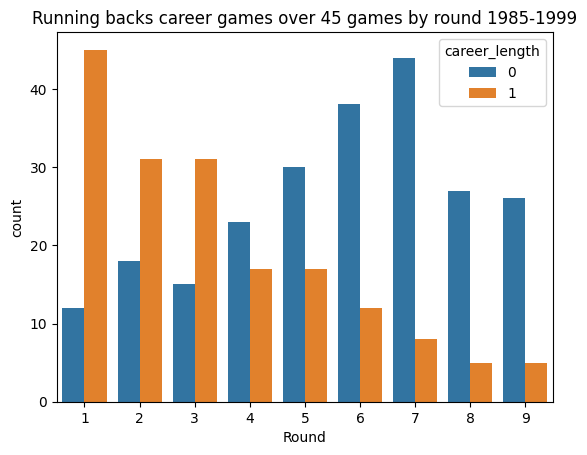

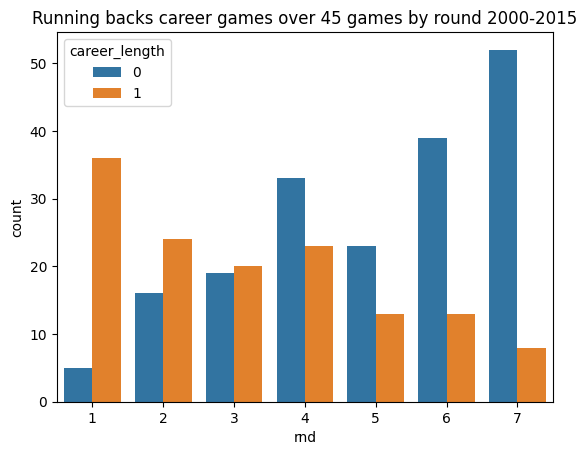

In [109]:
sns.countplot(before_df, x="rnd", hue='career_length')

plt.title("Running backs career games over 45 games by round 1985-1999")
plt.xlabel("Round")
plt.show()

sns.countplot(after_df, x="rnd", hue='career_length')

plt.title("Running backs career games over 45 games by round 2000-2015")
plt.show()

<Axes: >

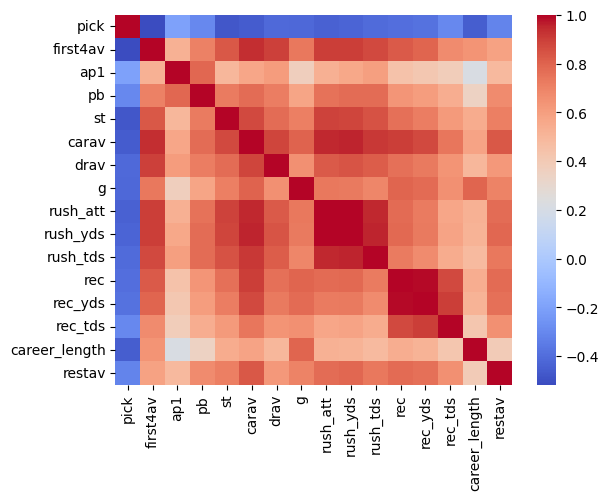

In [117]:
corr = rb_df.drop(['year', 'rnd', 'age', 'to'], axis=1).corr(numeric_only=True)
sns.heatmap(corr, cmap='coolwarm')
